# Подключение зависимостей

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Визуализация истории обучения 

In [18]:
import matplotlib.pyplot as plt

def plot_history(history, h2=None):
    acc = history.history['accuracy']
    loss = history.history['loss']
    if h2 is not None:
        acc += h2.history['accuracy']
        loss += h2.history['loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Точность обучения')
    plt.title('Точность обучения')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Потери при обучении')
    plt.title('Потери при обучении')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    plt.show()

# Однонаправленная однослойная LSTM с посимвольной токенизацией

## Загрузка и преобразование данных

In [6]:
data = pd.read_csv('./movies_subtitles.csv')
data['text'] = data['text'].fillna('')

data = data.head(10000)

## Токенизация и преобразование текста в последовательности

In [7]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(data['text'].values.tolist())
total_words = len(tokenizer.word_index) + 1


## Создание обучающих последовательностей 

In [8]:

input_sequences = []
for line in data['text'].values.tolist():
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)

## Построение модели и обучение модели

In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=10, verbose=1)


Epoch 1/10
10736/10736 [==============================] - 424s 39ms/step - loss: 2.0401 - accuracy: 0.4008
Epoch 2/10
10736/10736 [==============================] - 424s 40ms/step - loss: 1.6835 - accuracy: 0.4911
Epoch 3/10
10736/10736 [==============================] - 431s 40ms/step - loss: 1.5731 - accuracy: 0.5209
Epoch 4/10
10736/10736 [==============================] - 435s 41ms/step - loss: 1.5086 - accuracy: 0.5369
Epoch 5/10
10736/10736 [==============================] - 431s 40ms/step - loss: 1.4634 - accuracy: 0.5498
Epoch 6/10
10736/10736 [==============================] - 431s 40ms/step - loss: 1.4309 - accuracy: 0.5588
Epoch 7/10
10736/10736 [==============================] - 436s 41ms/step - loss: 1.4056 - accuracy: 0.5649
Epoch 8/10
10736/10736 [==============================] - 432s 40ms/step - loss: 1.3852 - accuracy: 0.5701
Epoch 9/10
10736/10736 [==============================] - 432s 40ms/step - loss: 1.3686 - accuracy: 0.5752
Epoch 10/10
10736/10736 [============

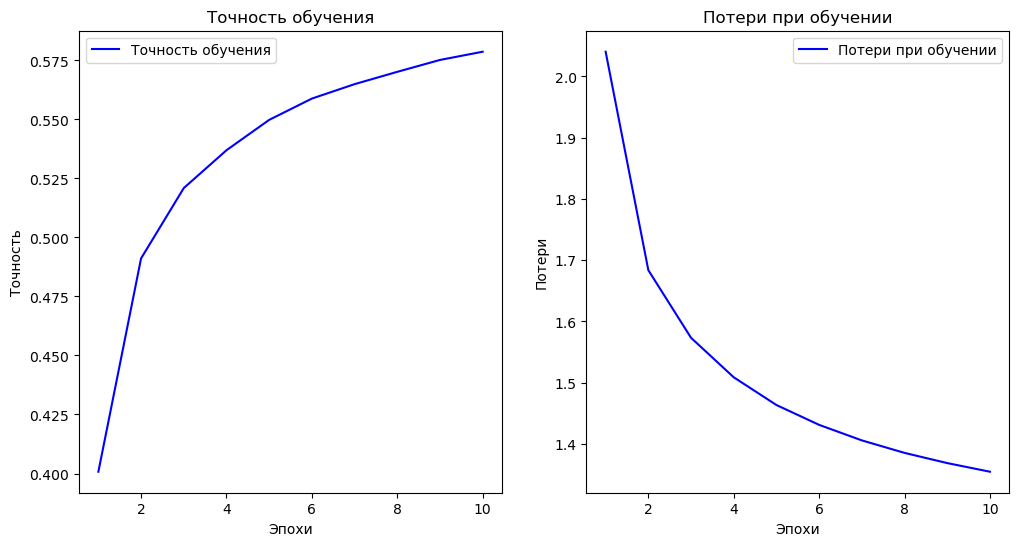

In [11]:
plot_history(history)

# Однонаправленная многослойная LSTM с посимвольной токенизацией

## Построение модели

In [19]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Обучение модели

In [20]:
history = model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
10736/10736 [==============================] - 916s 85ms/step - loss: 2.0187 - accuracy: 0.4082
Epoch 2/10
10736/10736 [==============================] - 908s 85ms/step - loss: 1.6445 - accuracy: 0.5003
Epoch 3/10
10736/10736 [==============================] - 909s 85ms/step - loss: 1.5304 - accuracy: 0.5305
Epoch 4/10
10736/10736 [==============================] - 904s 84ms/step - loss: 1.4672 - accuracy: 0.5473
Epoch 5/10
10736/10736 [==============================] - 911s 85ms/step - loss: 1.4209 - accuracy: 0.5596
Epoch 6/10
10736/10736 [==============================] - 907s 84ms/step - loss: 1.3852 - accuracy: 0.5688
Epoch 7/10
10736/10736 [==============================] - 915s 85ms/step - loss: 1.3549 - accuracy: 0.5770
Epoch 8/10
10736/10736 [==============================] - 919s 86ms/step - loss: 1.3316 - accuracy: 0.5822
Epoch 9/10
10736/10736 [==============================] - 914s 85ms/step - loss: 1.3101 - accuracy: 0.5883
Epoch 10/10
10736/10736 [============

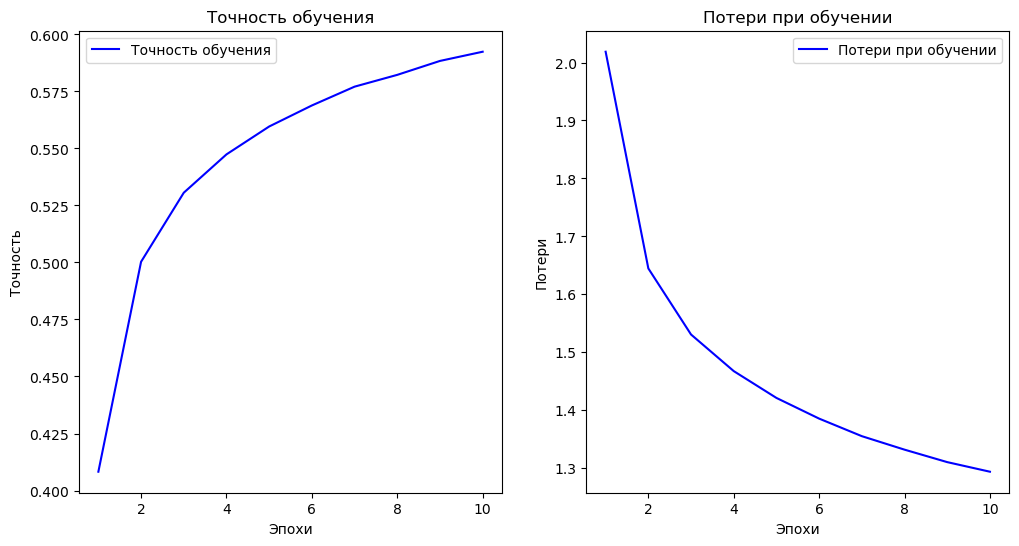

In [21]:
plot_history(history)

# Однонаправленная однослойная LSTM с пословной токенизацией

## Возьмем больше данных для пословной токенезации

In [4]:
data = pd.read_csv('./movies_subtitles.csv')
data['text'] = data['text'].fillna('')
data = data.head(20000)

## Токенизация и преобразование текста в последовательности

In [58]:
tokenizer = Tokenizer()  # Пословная токенизация
tokenizer.fit_on_texts(data['text'].values.tolist())
total_words = len(tokenizer.word_index) + 1

## Создание обучающих последовательностей

In [59]:
input_sequences = []
for line in data['text'].values.tolist():
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Определение максимальной длины последовательности
max_sequence_len = max([len(x) for x in input_sequences])

# Паддинг последовательностей
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Создание входных и выходных данных
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)

## Построение модели

In [61]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
3377/3377 [==============================] - 148s 43ms/step - loss: 6.6531 - accuracy: 0.0545
Epoch 2/20
3377/3377 [==============================] - 144s 43ms/step - loss: 5.8772 - accuracy: 0.1034
Epoch 3/20
3377/3377 [==============================] - 145s 43ms/step - loss: 5.4307 - accuracy: 0.1312
Epoch 4/20
3377/3377 [==============================] - 149s 44ms/step - loss: 5.0597 - accuracy: 0.1524
Epoch 5/20
3377/3377 [==============================] - 147s 44ms/step - loss: 4.7108 - accuracy: 0.1728
Epoch 6/20
3377/3377 [==============================] - 148s 44ms/step - loss: 4.3837 - accuracy: 0.1977
Epoch 7/20
3377/3377 [==============================] - 147s 43ms/step - loss: 4.0813 - accuracy: 0.2286
Epoch 8/20
3377/3377 [==============================] - 149s 44ms/step - loss: 3.8105 - accuracy: 0.2621
Epoch 9/20
3377/3377 [==============================] - 149s 44ms/step - loss: 3.5683 - accuracy: 0.2947
Epoch 10/20
3377/3377 [==============================] 

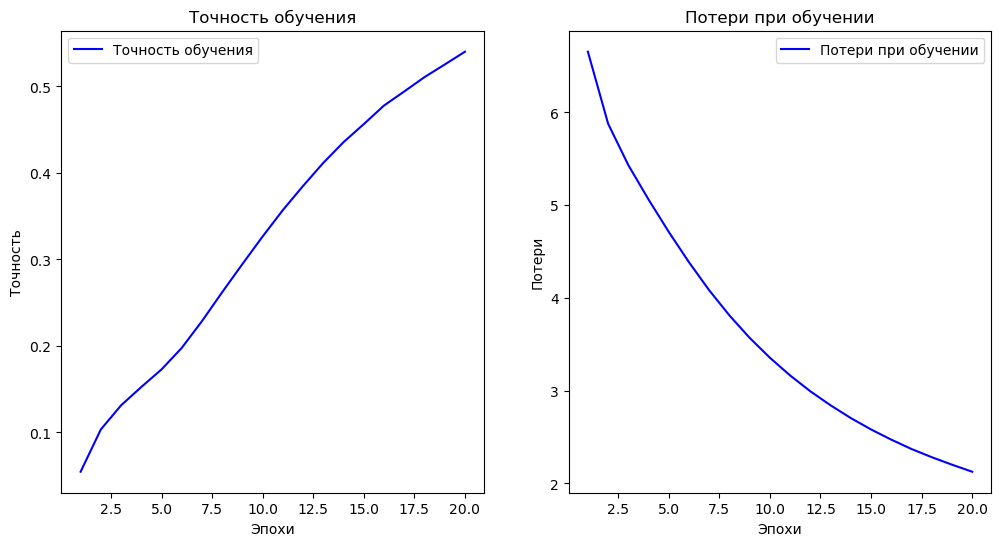

In [62]:
plot_history(history)

# Однонаправленная многослойная LSTM с пословной токенизацие

## Построение модели

In [63]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Обучение модели

In [64]:
history = model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
3377/3377 [==============================] - 187s 54ms/step - loss: 6.7421 - accuracy: 0.0460
Epoch 2/20
3377/3377 [==============================] - 182s 54ms/step - loss: 6.1390 - accuracy: 0.0742
Epoch 3/20
3377/3377 [==============================] - 183s 54ms/step - loss: 5.7701 - accuracy: 0.0997
Epoch 4/20
3377/3377 [==============================] - 182s 54ms/step - loss: 5.5107 - accuracy: 0.1129
Epoch 5/20
3377/3377 [==============================] - 183s 54ms/step - loss: 5.2884 - accuracy: 0.1237
Epoch 6/20
3377/3377 [==============================] - 183s 54ms/step - loss: 5.0861 - accuracy: 0.1326
Epoch 7/20
3377/3377 [==============================] - 186s 55ms/step - loss: 4.8845 - accuracy: 0.1416
Epoch 8/20
3377/3377 [==============================] - 183s 54ms/step - loss: 4.6915 - accuracy: 0.1494
Epoch 9/20
3377/3377 [==============================] - 182s 54ms/step - loss: 4.5110 - accuracy: 0.1589
Epoch 10/20
3377/3377 [==============================] 

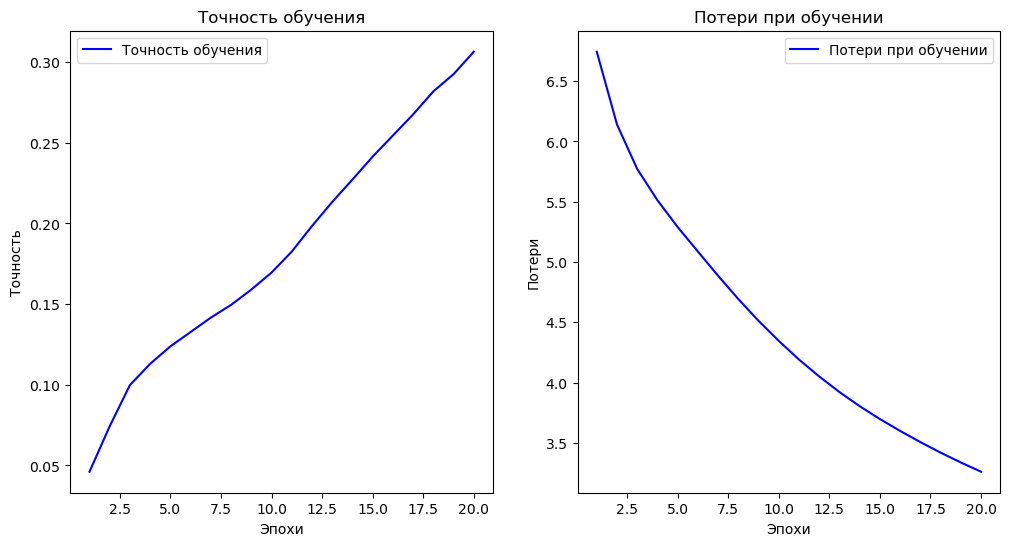

In [65]:
plot_history(history)

# Однонаправленная однослойная LSTM с BPE токенизацие

Для этого примера потребуется библиотека `tokenizers` от HuggingFace

## Инициализация токенизатора

In [5]:
from tokenizers import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing

tokenizer = ByteLevelBPETokenizer()
tokenizer.train_from_iterator(data['text'].values.tolist(), vocab_size=10000, min_frequency=2)

## Токенизация текста

In [6]:

input_sequences = []
for line in data['text'].values.tolist():
    tokenized_line = tokenizer.encode(line).ids
    for i in range(1, len(tokenized_line)):
        n_gram_sequence = tokenized_line[:i+1]
        input_sequences.append(n_gram_sequence)


## Создание входных и выходных данных

In [7]:
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

X, y = input_sequences[:,:-1], input_sequences[:,-1]
total_words = tokenizer.get_vocab_size()
y = to_categorical(y, num_classes=total_words)


## Построение модели и обучение

In [23]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
5679/5679 [==============================] - 293s 51ms/step - loss: 5.6883 - accuracy: 0.1723
Epoch 2/20
5679/5679 [==============================] - 294s 52ms/step - loss: 4.7204 - accuracy: 0.2419
Epoch 3/20
5679/5679 [==============================] - 293s 52ms/step - loss: 4.3322 - accuracy: 0.2642
Epoch 4/20
5679/5679 [==============================] - 291s 51ms/step - loss: 4.0300 - accuracy: 0.2820
Epoch 5/20
5679/5679 [==============================] - 293s 52ms/step - loss: 3.7667 - accuracy: 0.2989
Epoch 6/20
5679/5679 [==============================] - 294s 52ms/step - loss: 3.5241 - accuracy: 0.3204
Epoch 7/20
5679/5679 [==============================] - 293s 52ms/step - loss: 3.2982 - accuracy: 0.3442
Epoch 8/20
5679/5679 [==============================] - 290s 51ms/step - loss: 3.0917 - accuracy: 0.3709
Epoch 9/20
5679/5679 [==============================] - 296s 52ms/step - loss: 2.9017 - accuracy: 0.3985
Epoch 10/20
5679/5679 [==============================] 

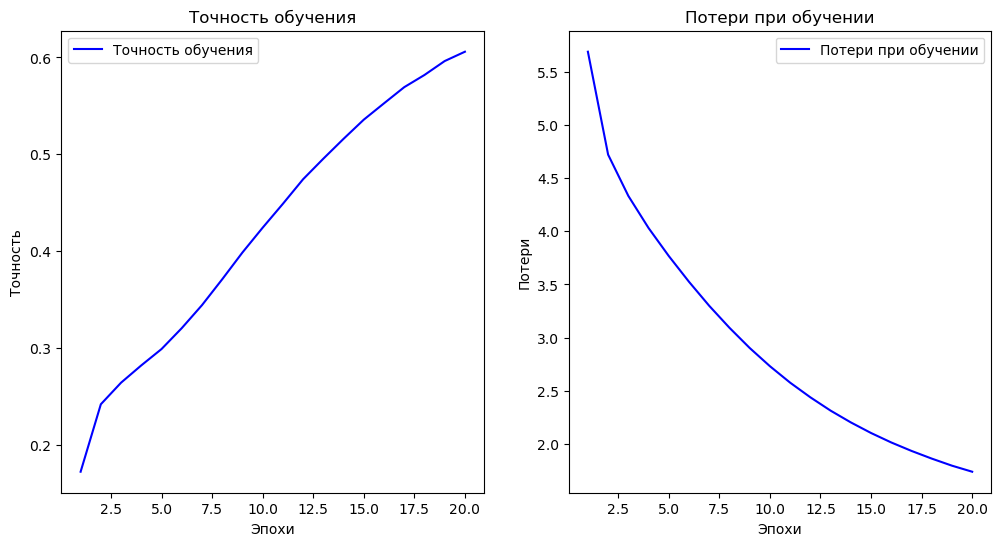

In [24]:
plot_history(history)

# Однонаправленная многослойная LSTM с BPE токенизацией

# Построение и обучение модели

In [71]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=20, verbose=1)

5679/5679 [==============================] - 403s 70ms/step - loss: 5.9752 - accuracy: 0.1446
Epoch 2/20
5679/5679 [==============================] - 402s 71ms/step - loss: 5.0419 - accuracy: 0.2075
Epoch 3/20
5679/5679 [==============================] - 399s 70ms/step - loss: 4.3714 - accuracy: 0.2456
Epoch 5/20
5679/5679 [==============================] - 392s 69ms/step - loss: 4.1620 - accuracy: 0.2549
Epoch 6/20
5679/5679 [==============================] - 368s 65ms/step - loss: 3.9823 - accuracy: 0.2639
Epoch 7/20
5679/5679 [==============================] - 367s 65ms/step - loss: 3.8202 - accuracy: 0.2727
Epoch 8/20
5679/5679 [==============================] - 370s 65ms/step - loss: 3.6737 - accuracy: 0.2817
Epoch 9/20
5679/5679 [==============================] - 371s 65ms/step - loss: 3.5407 - accuracy: 0.2914
Epoch 10/20
5679/5679 [==============================] - 373s 66ms/step - loss: 3.4179 - accuracy: 0.3011
Epoch 11/20
5679/5679 [==============================] - 371s 65m

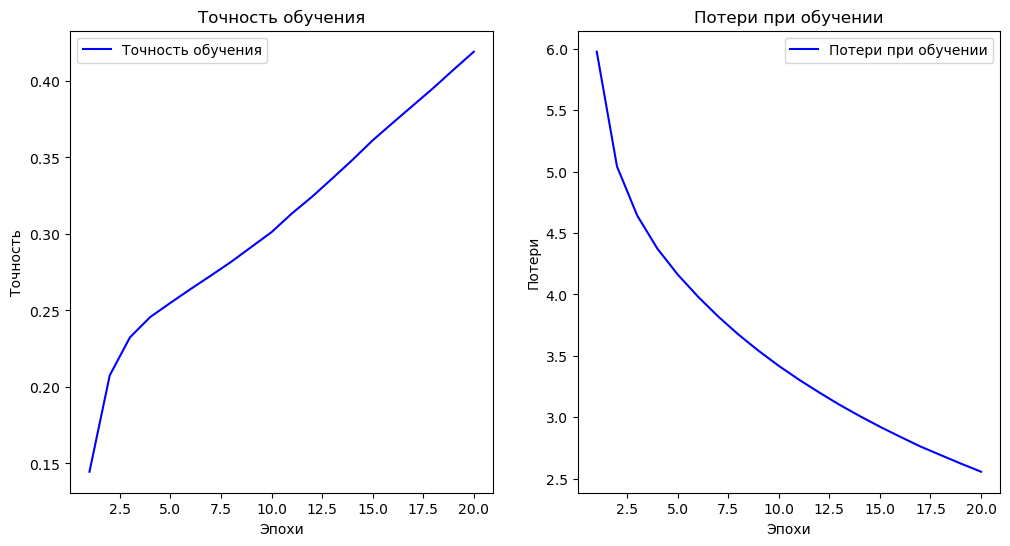

In [72]:
plot_history(history)

Сравнивая две модели с посимвольной токенезацией: однонаправленная однослойная и многослойная LSTM. По финальной точности 0.578 и 0.592 видно, что многослойная лучше справилась со своей задачей, однако для этого, как и для остальных сравнений лучше было бы провести дополнительное иследование(увеличить выборку и/или увеличить число эпох), однак мой ноутбук не позволяет сделать исследование более точным.
При сравнение однонаправленной однослойная LSTM и многослойной с пословной токенизацией произошел противополжный случай, однослойная модель справилась намного лучше многослойной об этом нам говорит точность и потери acc: 0.54 loss: 2.12 (однослойная) и acc: 0.30 loss 3.26. Это может указывать на то, что многослойная модель может быть слишком сложной для задачи, где используются слова как токены, и может переобучаться или испытывать трудности с обобщением.
При обучение моделей с BPE токенизацией так же однонаправленная многослойная LSTM и однонаправленная однослойная LSTM, так же однослойная справилась лучше loss 1.73 acc: 0.60 (однослойная) против loss 2.55 acc: 0.41 (многослойная).Это может быть связано с тем, что BPE токенизация создаёт более сложные токены, для которых дополнительная глубина не приносит значительной пользы или даже мешает модели, возможно, из-за излишней сложности или недостаточного объёма данных для полноценного обучения многослойной архитектуры.